In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
np.random.seed(1)
number_of_observtion=2000

x1=np.random.multivariate_normal([0, 0],[[1, 1.7],[1.7, 1]], number_of_observtion)
x2=np.random.multivariate_normal([5, 5],[[1, 1.7],[1.7, 1]], number_of_observtion)

C:\Users\DHRUVIL\Anaconda_3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.
C:\Users\DHRUVIL\Anaconda_3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """


In [24]:
x_combined=np.vstack((x1,x2))

In [25]:
labels=np.hstack((np.ones(number_of_observtion),np.zeros(number_of_observtion)))

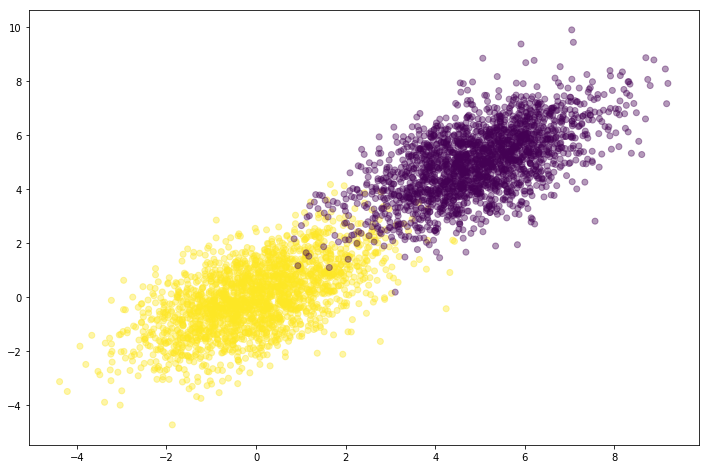

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(x_combined[:, 0], x_combined[:, 1],
            c = labels, alpha = .4)

# Defining the characteristic function

In [37]:
def sigmoid(scores):
        y=1/(1+np.exp(scores))
        return y

In [38]:
def log_likelihood(features,target,weights):
    scores=np.dot(features,weights)
    result=scores*target - np.log(1+np.exp(scores))
    return result

In [65]:
def logistic_regression(features,target,steps,learning_rate,add_intercept=False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
    
    weights=np.zeros(features.shape[1])
    for step in range(steps):
        score=np.dot(features,weights)
        value=sigmoid(score)
        
        
        output_error=target-value
        gradient=np.dot(features.T,output_error)
        weights+=learning_rate*gradient

    return weights

In [66]:
weights = logistic_regression(x_combined,labels,
                     steps = 3000, learning_rate = 5e-5, add_intercept=True)
